## PRACTICO 1:
    
# INTEGRANTES:
  - CERINO FRANCO
  - PAEZ GASTON
  - ZACCO FRANCO



Introduccion:
    Durante este práctico vamos a trabajar sobre el dataset Human Freedom Index 2018 de el instituto Cato. Este índice mide 
    en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos 
    aspectos, hasta obtener un coeficiente entre 1 y 10. Usaremos una versión ya limpia del dataset que pueden descargar 
    desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

Rule of Law
Security and Safety
Movement
Religion
Association, Assembly, and Civil Society
Expression and Information
Identity and Relationships
Size of Government
Legal System and Property Rights
Access to Sound Money
Freedom to Trade Internationally
Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a Identity and 
Relationships en paises de Latinoamérica, y los compararemos con las estadísticas globales.

In [2]:
import matplotlib.pyplot as plt
import numpy 
import pandas
import seaborn
from scipy import stats

In [3]:
#Lectura y breve descripcion dimensional del dataset
url = 'https://raw.githubusercontent.com/francozacco/diplodatos-CePaZa/master/Analisis%20y%20Visualizaci%C3%B3n%20de%20Datos/hfi_cc_2018.csv'
dataset = pandas.read_csv(url)

dataset.shape

(1458, 123)

In [4]:
#Exploracion de 
dataset.columns [30:80]

Index(['pf_religion_restrictions', 'pf_religion', 'pf_association_association',
       'pf_association_assembly', 'pf_association_political_establish',
       'pf_association_political_operate', 'pf_association_political',
       'pf_association_prof_establish', 'pf_association_prof_operate',
       'pf_association_prof', 'pf_association_sport_establish',
       'pf_association_sport_operate', 'pf_association_sport',
       'pf_association', 'pf_expression_killed', 'pf_expression_jailed',
       'pf_expression_influence', 'pf_expression_control',
       'pf_expression_cable', 'pf_expression_newspapers',
       'pf_expression_internet', 'pf_expression', 'pf_identity_legal',
       'pf_identity_parental_marriage', 'pf_identity_parental_divorce',
       'pf_identity_parental', 'pf_identity_sex_male',
       'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce',
       'pf_identity', 'pf_score', 'pf_rank', 'ef_government_consumption',
       'ef_government_transfers', 'ef_gove

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

# 1- Estadísticos descriptivos

## 1.1-  Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [6]:
dataset[important_cols]
dcr = pandas.DataFrame(dataset[important_cols].describe().loc[['max','min']])
table = pandas.DataFrame(dcr.max() - dcr.min(), columns=["Amplitud de las variables"])  
table

,Amplitud de las variables
year,8.000000
pf_identity_legal,10.000000
pf_identity_parental_marriage,10.000000
pf_identity_parental_divorce,10.000000
pf_identity_parental,10.000000
pf_identity_sex_male,10.000000
pf_identity_sex_female,10.000000
pf_identity_sex,10.000000
pf_identity_divorce,10.000000
pf_identity,10.000000


## 1.2 - Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [7]:
#Calculamos la media, mediana y desviacion estandar de pf_identity y de hf_score globalmente
ds_pf_mmstd = dataset['pf_identity'].describe()
ds_hf_mmstd = dataset['hf_score'].describe()
median_pf = dataset['pf_identity'].median(skipna=True)
median_hf = dataset['hf_score'].median(skipna=True)

#Calculamos la media, mediana y desviacion estandar de pf_identity y de hf_score solo para Latino América
ds_latam = dataset[dataset['region'] == 'Latin America & the Caribbean']
ds_latam_pf = ds_latam['pf_identity'].describe()
ds_latam_median_pf = ds_latam['pf_identity'].median(skipna=True)
ds_latam_hf = ds_latam['hf_score'].describe()
ds_latam_median_hf = ds_latam['hf_score'].median(skipna=True)

mmstd_pf_hf = {'global_pf_identity': [ds_pf_mmstd['mean'], median_pf, ds_pf_mmstd['std']], 'global_hf_score': [ds_hf_mmstd['mean'], median_hf, ds_hf_mmstd['std']],'latam_pf_identity': [ds_latam_pf['mean'], ds_latam_median_pf, ds_latam_pf['std']],'latam_hf_score': [ds_latam_hf['mean'], ds_latam_median_hf, ds_latam_hf['std']],'': ['media','mediana','desviacion estandar']}
mmstd_pf_hf = pandas.DataFrame(data=mmstd_pf_hf)
mmstd_pf_hf.set_index('', inplace=True)

mmstd_pf_hf

,global_pf_identity,global_hf_score,latam_pf_identity,latam_hf_score
,,,,
media,7.334180,6.993444,8.765086,7.047982
mediana,9.166667,6.923840,10.000000,7.028045
desviacion estandar,3.159473,1.025811,1.711732,0.608904


### Entendemos que no tiene sentido calcular la moda pues pf_identity es una variable continua, de realizar un calculo de la moda se podría tomar intervalos y calcular la moda sobre estos para obtener resultados significativos. Una elección posible es tomar la cantidad de intervalos dada por sqrt(n), donde n es la cantidad de datos del dominio de la variable, como se realiza al confeccionar un histograma.


## 1.3 - ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

### Los valores no son directamente comparables pues hay paises en situación de guerra y otros en situaciones mucho mas estables. Es decir esta podría ser una de las variables que influenciaría los valores.

### Con respecto al comportamiento de las variables, una forma que se puede visualizar el comportamiento de ambas variables es realizando un gráfico de las mismas en función del tiempo. El gráfico obtenido se puede ver en la sección 2.1. A partir de este se puede observar que ambas variables tienen  una tendencia decreciente, pero a la vez  no es clara ninguna correlación  entre estas. En ocasiones puede ser útil realizar este tipo de análisis porque puede mostrar alguna tendencia que aporte al análisis de datos.


 

## 1.4 -  ¿Cómo pueden sanearse los valores faltantes?

### Las funciones por defecto aplican diferentes criterios sobre los datos faltantes, algunas completan los campos con ceros, otras con la media de la variable y otras eliminan tales valores. En este caso se podria proponer reemplazar los campos faltantes por la proyeccion de los mismos sobre la recta de mejor ajuste.

## 1.5 - ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

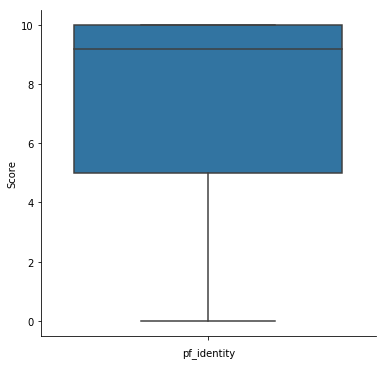

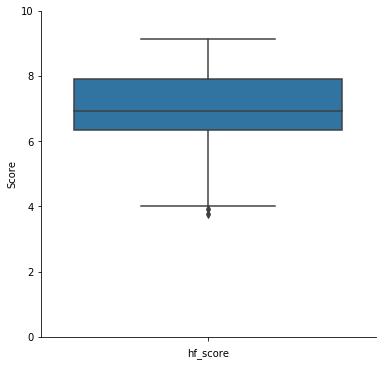

In [8]:
plt.figure(figsize=(6,6))
seaborn.boxplot(data=dataset,
                y='pf_identity'
               )
plt.ylabel('Score')
plt.xlabel('pf_identity')
seaborn.despine()

plt.figure(figsize=(6,6))
seaborn.boxplot(data=dataset,
                y='hf_score'
               )
plt.ylabel('Score')
plt.xlabel('hf_score')
plt.ylim(0,10)
seaborn.despine()

### Si, hay outliers en ambas variables, una forma de encontrarlos es usando un boxplot.

Relación entre pf_identity y hf_score por región:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

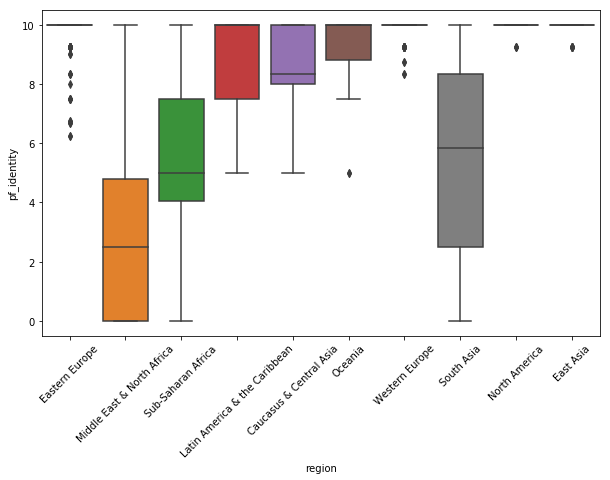

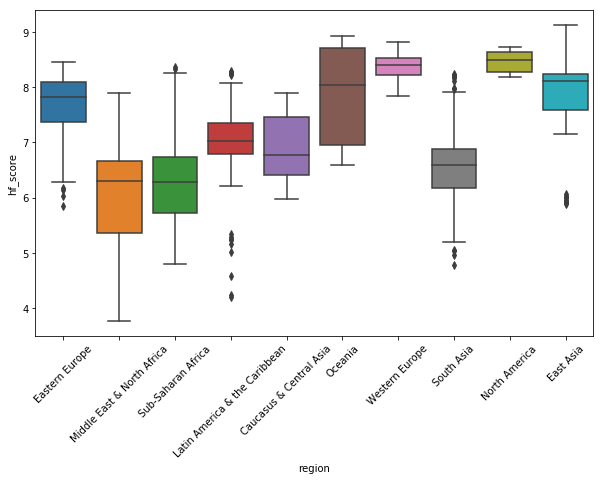

In [9]:
print('Relación entre pf_identity y hf_score por región:')

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                  x='region', y='pf_identity'
                  )
plt.xticks(rotation=45)

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                  x='region', y='hf_score'
                  )
plt.xticks(rotation=45)

### Para algunas regiones observamos ouliers tanto para la variable pf_identity como para hf_score. No eliminariamos estos datos ya que podriamos decir que no son errores y aunque se encuentren alejados de los valores son datos reales y tal vez sean los valores que realmente queremos analizar.

# 2 - AGREGACION DE DATOS

## 2.1 - Graficar la media de la variable pf_identity y hf_score a través de los años.

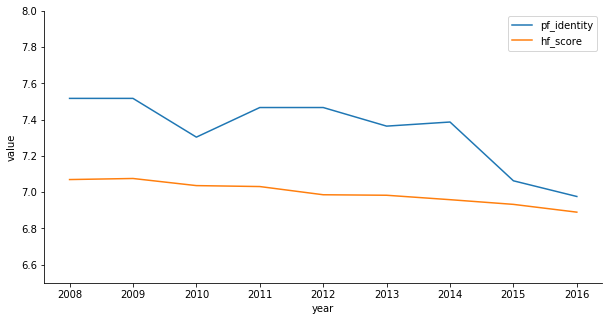

In [10]:
df = dataset[['year','pf_identity','hf_score']].groupby(['year']).mean().reset_index()

plt.figure(figsize=(10,5))
seaborn.lineplot(data=df, x='year', y='pf_identity', label='pf_identity')
seaborn.lineplot(data=df, x='year', y='hf_score', label='hf_score')
plt.ylabel('value')
plt.ylim(6.5, 8.)
seaborn.despine()

## 2.2 - Graficas (hf_score .vs. year) de evolucion temporal de la libertad humana a  traves del tiempo, y por región.

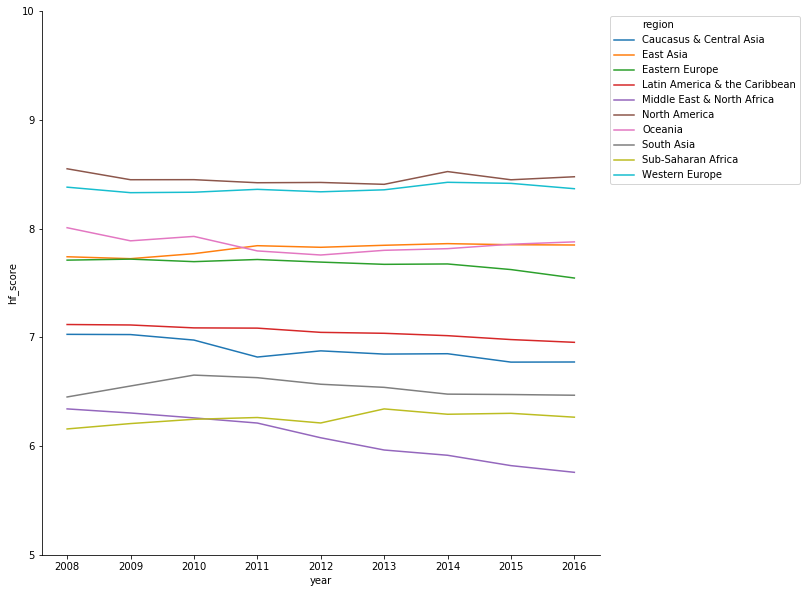

In [11]:
df_region = dataset[['year','pf_identity','hf_score','region']].groupby(['region','year']).mean().reset_index()

plt.figure(figsize=(10,10))
seaborn.lineplot(data=df_region, x='year', y='hf_score', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.ylim(5, 10)
seaborn.despine()

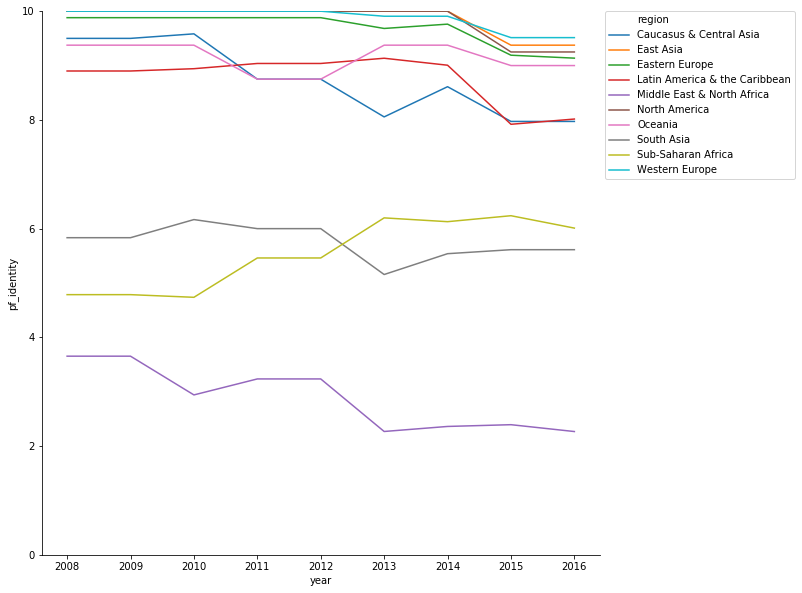

In [0]:
plt.figure(figsize=(10,10))
seaborn.lineplot(data=df_region, x='year', y='pf_identity', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 10)
seaborn.despine()

### Puede apreciarse que al graficar los datos separados en regiones la tendencia no es la misma, el mayor detalle obtenido permite describir mejor el comportamiento de la variable; puede notarse ademas un leve decaimiento para la region "Middle East & North Africa" que ademas tiene los valores mas bajos.
### El decaimiento generalizado a partir del año 2014 estaria dado según el informe de estos datos, debido a que se agrego una variable mas al calculo del valor de pf_identity.

## 2.3 - Inspección de la tendencia en America Latina

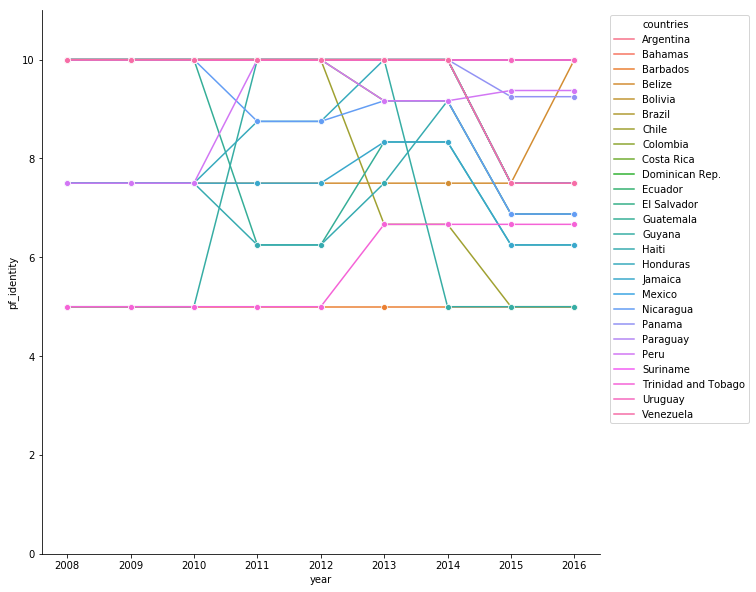

In [12]:
#Separamos los datos en Latino America & el Caribe
ds_latam_complete = dataset[dataset['region'] == 'Latin America & the Caribbean']
ds_latam = ds_latam_complete[['year','pf_identity','countries','region']]

#Graficamos la curva para todos los paises de Latino America.
plt.figure(figsize=(10,10))
seaborn.lineplot(data=ds_latam, x='year', y='pf_identity', hue='countries', marker='o')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.ylim(0,11)
seaborn.despine()


### Si bien al graficar todos los  paises correspondientes a America Latina y el Caribe la grafica se torna en determinados momentos inentendible. Si podemos notar que existen algunos paises que disminuyen en pf_identity en el periodo 2014 - 2016, según el informe adjunto a este dataset esta disminución fue causada por una nueva variable agregada al calculo del pf_identity como se menciono en el punto anterior.

# 2 - DISTRIBUCIONES

## 2.1 - Histogramas de la distribución de la variable pf_identity y hf_score

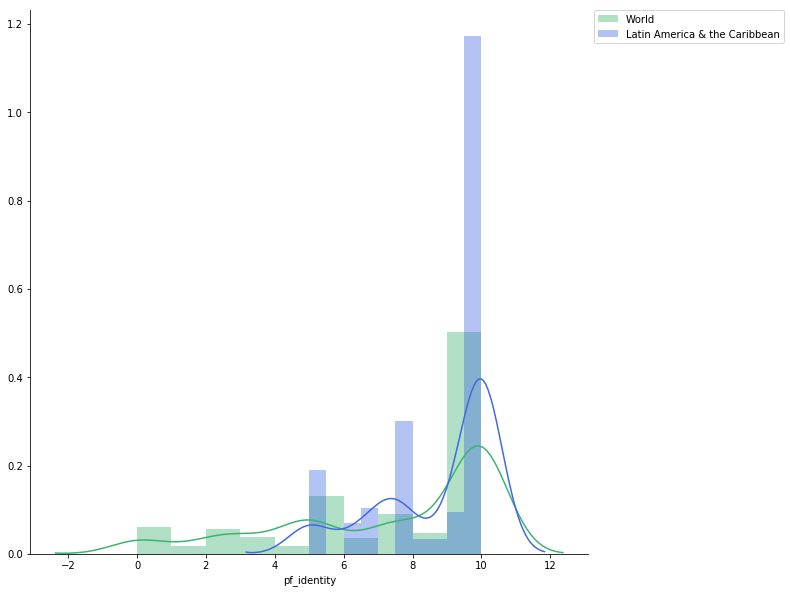

In [13]:
#Ploteamos pf_identity en forma global y para Latinoamerica y el caribe
plt.figure(figsize=(10,10))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10, color='mediumseagreen', label='World')
seaborn.distplot(ds_latam['pf_identity'].dropna(), bins=10, color='royalblue', label='Latin America & the Caribbean')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
seaborn.despine()

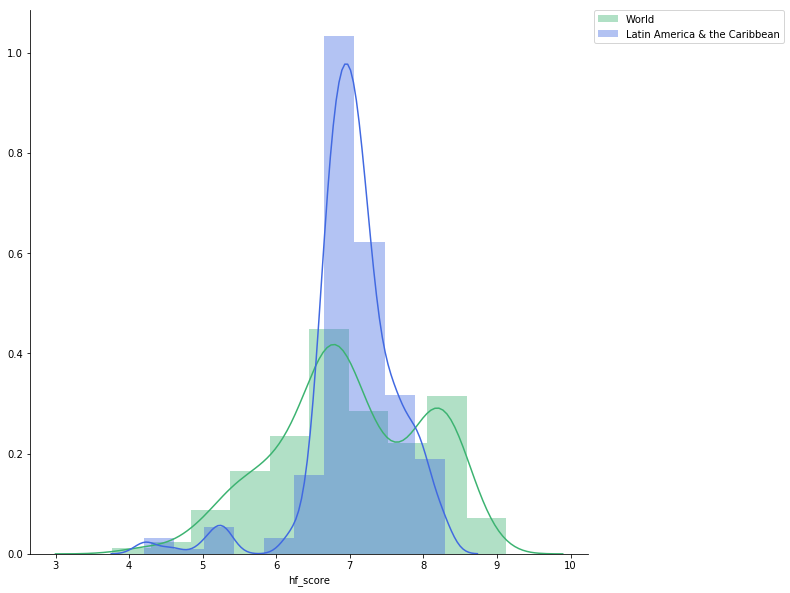

In [0]:
#Ploteamos hf_score en forma global y para Latinoamerica y el caribe
plt.figure(figsize=(10,10))
seaborn.distplot(dataset['hf_score'].dropna(), bins=10, color='mediumseagreen', label='World')
seaborn.distplot(ds_latam_complete['hf_score'].dropna(), bins=10, color='royalblue', label='Latin America & the Caribbean')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
seaborn.despine()

### Las graficas no arrojan evidencia consistente sobre el tipo de distribucion al que obedece la muestra.

## 2.2 - Prueba de Kolmogorov-Smirnof

### Se plantea como hipotesis nula que la distribución no es normal.

In [14]:
#Cálculo del test KS para el pf_indetity del dataset global
ds_world_pf = dataset['pf_identity']
mean_wpf, std_wpf = stats.norm.fit(ds_world_pf.dropna())
ds_world_pf_norm = (ds_world_pf - mean_wpf) / std_wpf
stats.kstest(ds_world_pf_norm.dropna(), 'norm')

KstestResult(statistic=0.2368216885475004, pvalue=1.7837097494493251e-68)

In [15]:
#Cálculo del test KS para el pf_indetity del dataset de America Latina
ds_latam_pf = ds_latam['pf_identity']
mean_lapf, std_lapf = stats.norm.fit(ds_latam_pf.dropna())
ds_latam_pf_norm = (ds_latam_pf - mean_lapf) / std_lapf
stats.kstest(ds_latam_pf_norm.dropna(), 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [16]:
#Cálculo del test KS para el hf_score del dataset global
ds_world_hf = dataset['hf_score']
mean_whf, std_whf = stats.norm.fit(ds_world_hf.dropna())
ds_world_hf_norm = (ds_world_hf - mean_whf) / std_whf
stats.kstest(ds_world_hf_norm.dropna(), 'norm')

KstestResult(statistic=0.06606589707833843, pvalue=1.1309978419994058e-05)

In [17]:
#Cálculo del test KS para el hf_score del dataset de America Latina
ds_latam_hf = ds_latam_complete['hf_score']
mean_lahf, std_lahf = stats.norm.fit(ds_latam_hf.dropna())
ds_latam_hf_norm = (ds_latam_hf - mean_lahf) / std_lahf
stats.kstest(ds_latam_hf_norm.dropna(), 'norm')

KstestResult(statistic=0.15003247403280606, pvalue=5.043599840583937e-05)

### Del KS-Test podemos concluimos que no se puede descartar la hipotesis nula.

## 2.3 - Grafico QQ de la muestra para America Latina

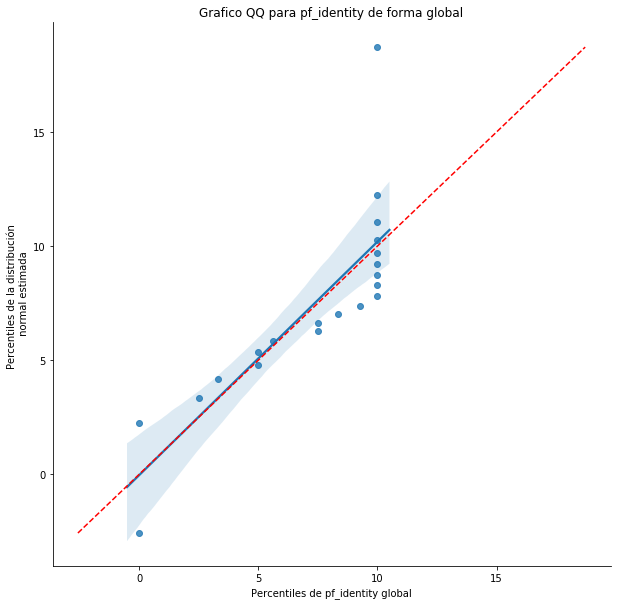

In [18]:
#Grafico QQ para pf_identity de forma global
norm_dist_wpf = stats.norm(mean_wpf, std_wpf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_wpf = numpy.percentile(ds_world_pf.dropna(), percs)
qn_norm_dist_wpf = numpy.percentile(norm_dist_wpf.rvs(len(ds_world_pf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_wpf, y=qn_norm_dist_wpf)
plt.xlabel('Percentiles de pf_identity global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para pf_identity de forma global')
x = numpy.linspace(numpy.min((qn_sample_wpf.min(), qn_norm_dist_wpf.min())), numpy.max((qn_sample_wpf.max(),qn_norm_dist_wpf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

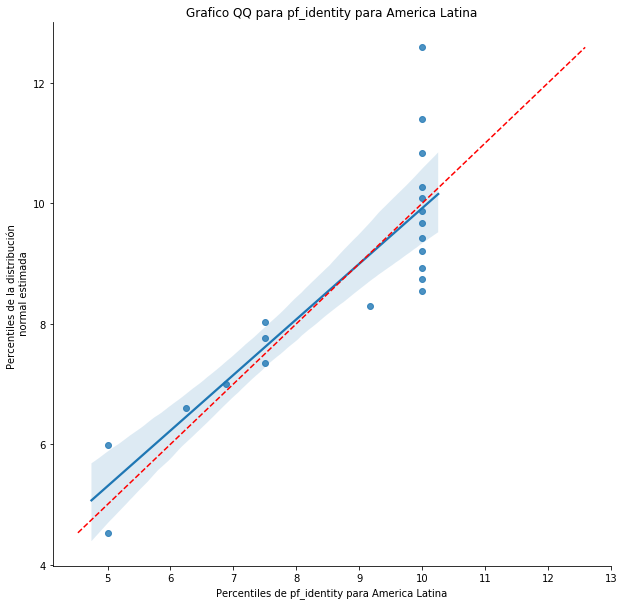

In [0]:
#Grafico QQ para pf_identity para America Latina
norm_dist_lapf = stats.norm(mean_lapf, std_lapf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_lapf = numpy.percentile(ds_latam_pf.dropna(), percs)
qn_norm_dist_lapf = numpy.percentile(norm_dist_lapf.rvs(len(ds_latam_pf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_lapf, y=qn_norm_dist_lapf)
plt.xlabel('Percentiles de pf_identity para America Latina')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para pf_identity para America Latina')
x = numpy.linspace(numpy.min((qn_sample_lapf.min(), qn_norm_dist_lapf.min())),
                   numpy.max((qn_sample_lapf.max(),qn_norm_dist_lapf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

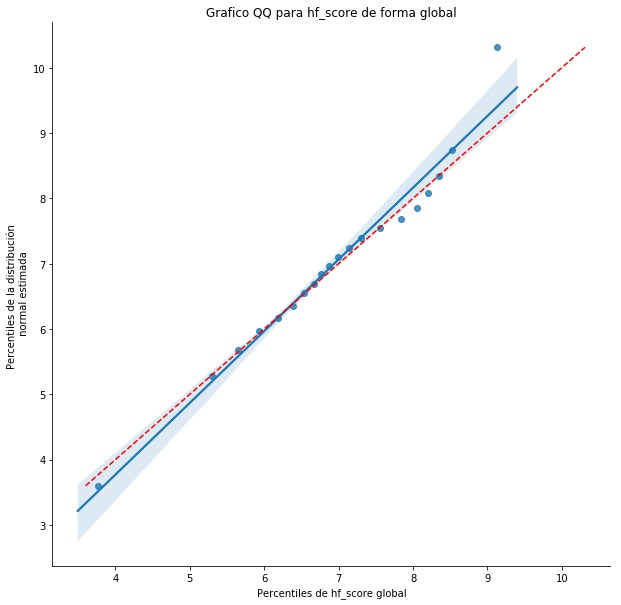

In [19]:
#Grafico QQ para hf_score de forma global
norm_dist_whf = stats.norm(mean_whf, std_whf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_whf = numpy.percentile(ds_world_hf.dropna(), percs)
qn_norm_dist_whf = numpy.percentile(norm_dist_whf.rvs(len(ds_world_hf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_whf, y=qn_norm_dist_whf)
plt.xlabel('Percentiles de hf_score global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para hf_score de forma global')
x = numpy.linspace(numpy.min((qn_sample_whf.min(), qn_norm_dist_whf.min())), 
                   numpy.max((qn_sample_whf.max(),qn_norm_dist_whf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

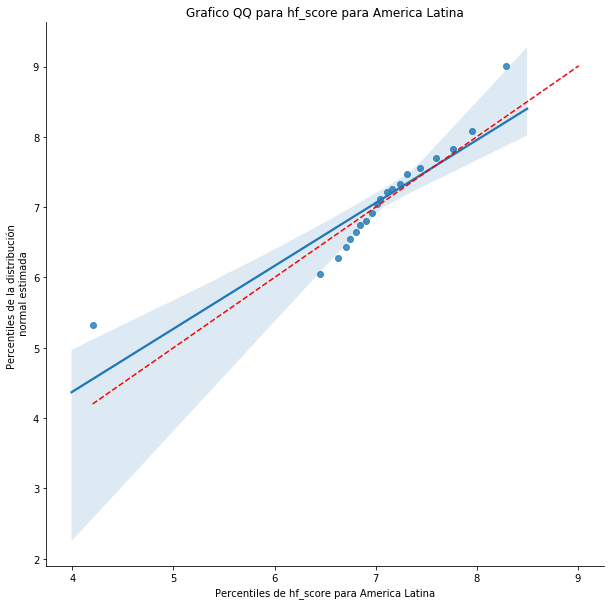

In [0]:
#Grafico QQ para hf_score para America Latina
norm_dist_lahf = stats.norm(mean_lahf, std_lahf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_lahf = numpy.percentile(ds_latam_hf.dropna(), percs)
qn_norm_dist_lahf = numpy.percentile(norm_dist_lahf.rvs(len(ds_latam_hf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_lahf, y=qn_norm_dist_lahf)
plt.xlabel('Percentiles de hf_score para America Latina')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para hf_score para America Latina')
x = numpy.linspace(numpy.min((qn_sample_lahf.min(), qn_norm_dist_lahf.min())), 
                   numpy.max((qn_sample_lahf.max(),qn_norm_dist_lahf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

### Los graficos QQ no arrojan ninguna evidencia si la distribución es normal. Tampoco podemos inferir rapidamente si se trata de otra distribución conocida.


## 2.4 - Medición de simetria (skewness) y curtosis

In [20]:
#Cálculo de skewness y Curtosis para pf_identity 
kurt_wpf = ds_world_pf.kurtosis(axis=0, skipna=True)
skew_wpf = ds_world_pf.skew(axis=0, skipna=True)
kurt_lapf = ds_latam_pf.kurtosis(axis=0, skipna=True)
skew_lapf = ds_latam_pf.skew(axis=0, skipna=True)
sk_pf1 = {'Curtosis': [kurt_wpf, kurt_lapf],'Skewness': [skew_wpf, skew_lapf], 'Región':['Global', 'América Latina']}
sk_pf = pandas.DataFrame(data=sk_pf1)
sk_pf

,Curtosis,Skewness,Región
0,-0.411975,-0.913172,Global
1,-0.275455,-1.054675,América Latina


In [21]:
#Cálculo de skewness y Curtosis para hf_score
kurt_whf = ds_world_hf.kurtosis(axis=0, skipna=True)
skew_whf = ds_world_hf.skew(axis=0, skipna=True)
kurt_lahf = ds_latam_hf.kurtosis(axis=0, skipna=True)
skew_lahf = ds_latam_hf.skew(axis=0, skipna=True)
sk_hf1 = {'Curtosis': [kurt_whf, kurt_lahf],'Skewness': [skew_whf, skew_lahf], 'Región':['Global', 'América Latina']}
sk_hf = pandas.DataFrame(data=sk_hf1)
sk_hf

,Curtosis,Skewness,Región
0,-0.507680,-0.212283,Global
1,5.483406,-1.451494,América Latina


# 3 - Correlaciones

## 3.1 - Inspeccion de correlaciones con pairplot

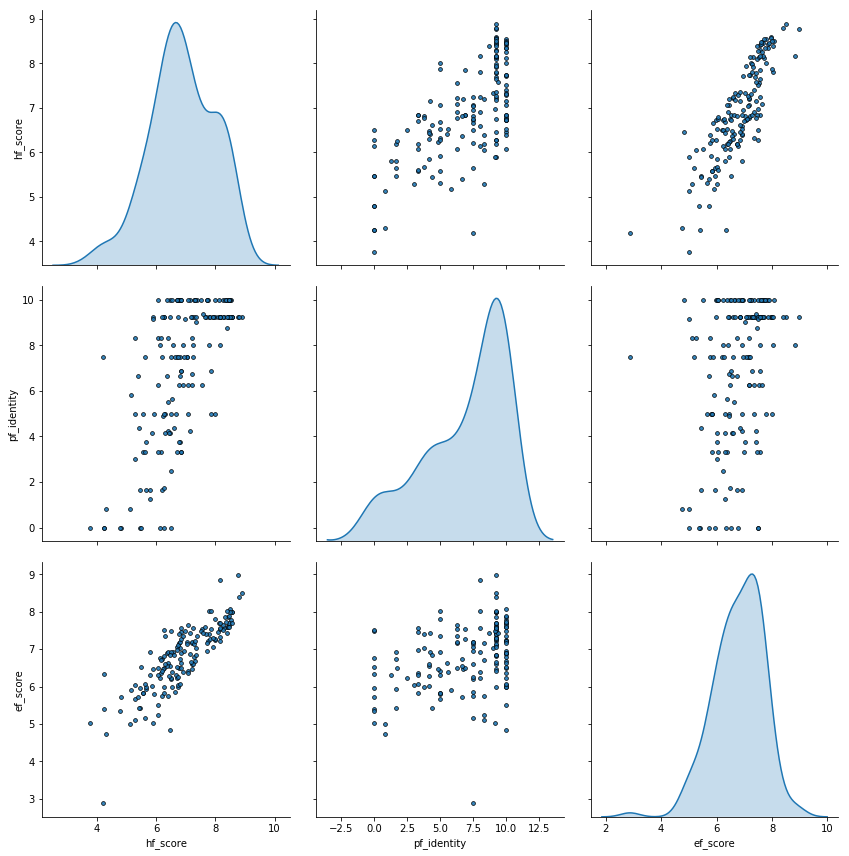

In [22]:
dat = dataset[dataset.year == 2016]
seaborn.pairplot(data=dat, dropna= True ,diag_kind="kde", plot_kws = {'alpha': 0.9, 's': 15, 'edgecolor': 'k'}, vars=['hf_score',
'pf_identity', 'ef_score'], height=4)
seaborn.despine()

###  * Se puede ver con un simple grafico a pares, que existe globalmente una correlacion entre las variables ef_score y hf_score, tambien puede apreciarse el desbalance que posee la muestra para los valores que toma la variable pf_identity. Se realizó el grafico con datos del año 2016 para evitar la superposicion de puntos.


## 3.2 - Correlaciones entre hf_score, pf_identity y ef_score

### Observando la variable hf_score :

Text(0, 0.5, 'hf_score')

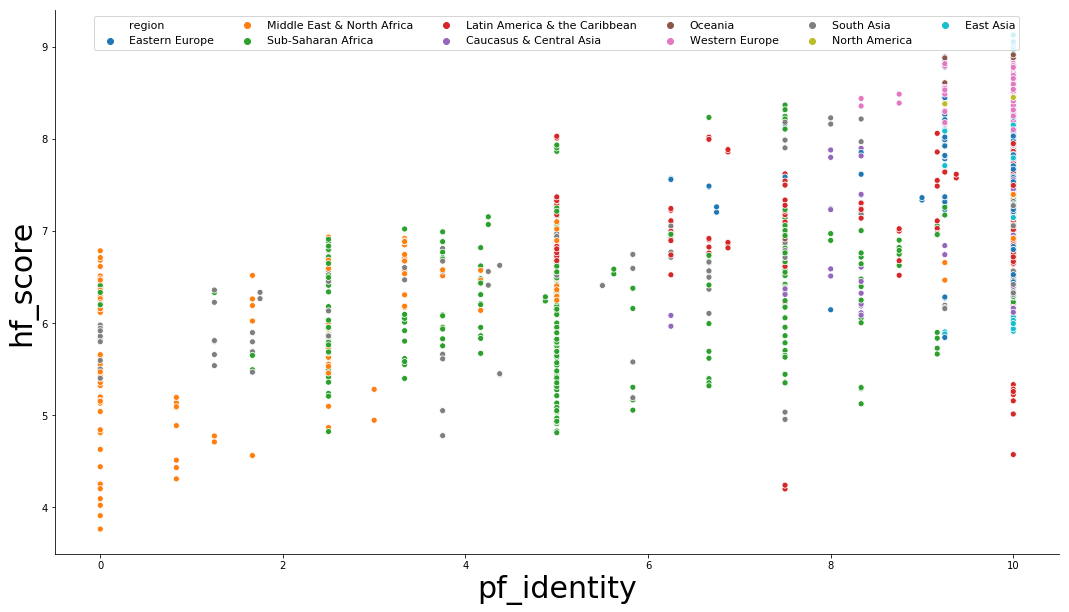

In [23]:
plt.figure(figsize=(18,10))
seaborn.scatterplot(data=dataset, x='pf_identity', y='hf_score', hue = 'region' )
seaborn.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=6, fancybox=True, fontsize=11)
plt.xlabel("pf_identity", fontsize=30)
plt.ylabel("hf_score", fontsize=30)

### * Graficar toda la muestra en simultaneo no permite en este caso apreciar la tendencia, haremos un analisis mas detallado.

Text(16.300000000000004, 0.5, 'hf_score')

<Figure size 288x288 with 0 Axes>

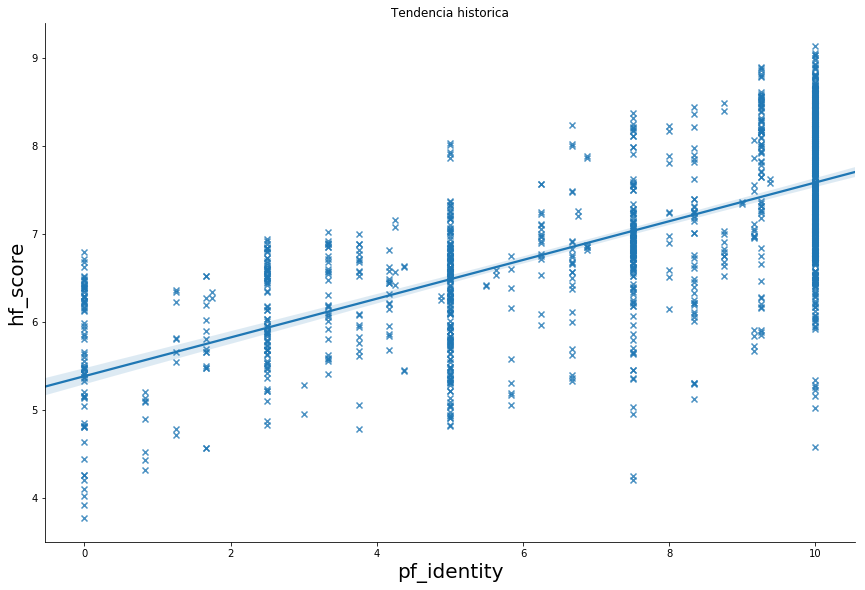

In [24]:
#En particular ajustamos linealmente el set de datos nos arrojara una linea de tendencia, pero no tiene mucho sentido 
# evaluar esa "tendencia historica" sino mas bien una evolucion o lograr obtener una descripcion por regiones.
plt.figure(figsize=(4,4))
seaborn.lmplot(data=dataset, markers= "x", x='pf_identity', y='hf_score',height= 8, aspect= 1.5)
plt.title("Tendencia historica")
plt.xlabel("pf_identity", fontsize=30)
plt.xlabel("pf_identity", fontsize=20)
plt.ylabel("hf_score", fontsize=20)

### Podemos analizar la tendencia temporal entre las variables pf_identity y hf_score

(-0.1, 10.1)

<Figure size 216x216 with 0 Axes>

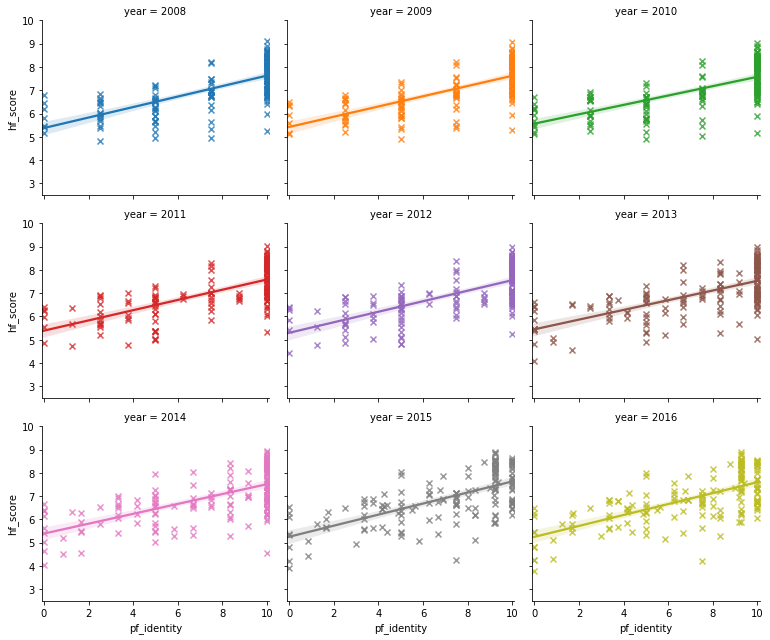

In [25]:
plt.figure(figsize=(3,3))
seaborn.lmplot(data=dataset, legend=True, markers= "x", x='pf_identity', y='hf_score', col="year", hue="year", height= 3, col_wrap=3, aspect= 1.2)
plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)

### Tambien podemos hacerlo por region : 

(-0.1, 10.1)

<Figure size 432x432 with 0 Axes>

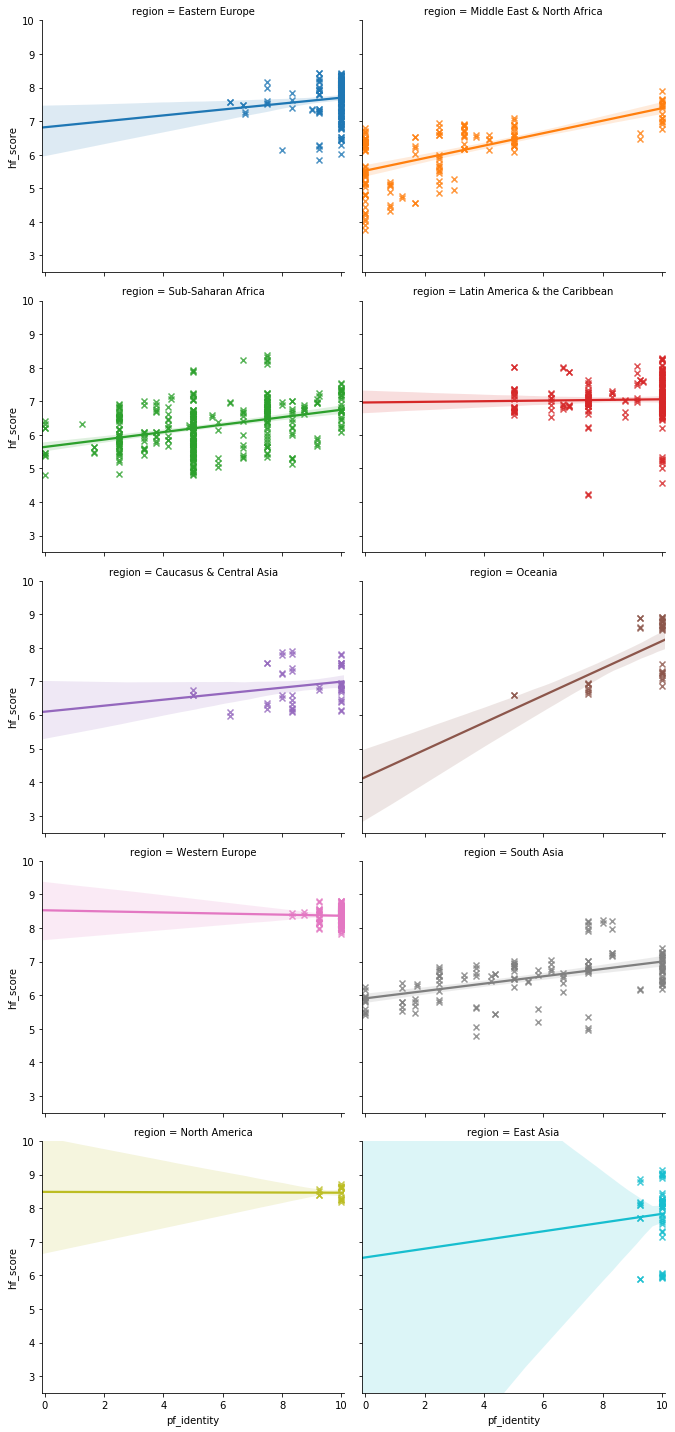

In [26]:
plt.figure(figsize=(6,6))
seaborn.lmplot(data=dataset, markers= "x", x='pf_identity', y='hf_score', col="region",col_wrap=2, hue="region", height= 4, aspect= 1.2)
plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)

### Observando la variable ef_score :


Text(16.299999999999997, 0.5, 'ef_score')

<Figure size 216x216 with 0 Axes>

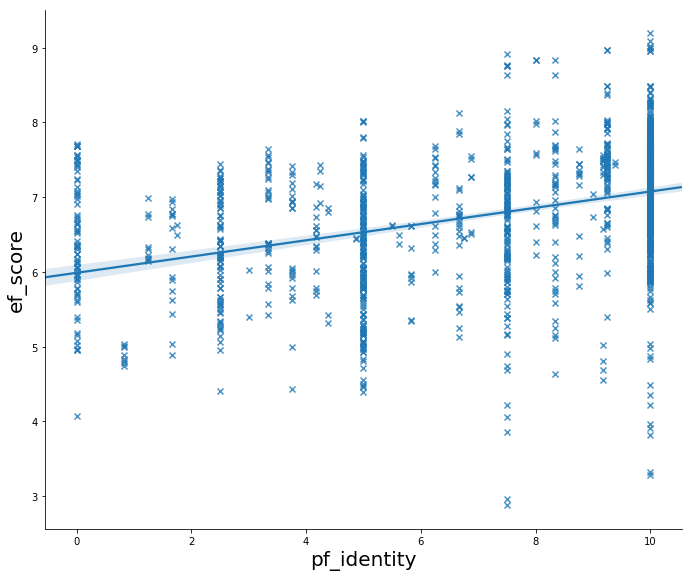

In [27]:
plt.figure(figsize=(3,3))
seaborn.lmplot(data=dataset, legend=True, markers= "x", x='pf_identity', y='ef_score', height= 8, aspect= 1.2)
plt.xlabel("pf_identity", fontsize=20)
plt.ylabel("ef_score", fontsize=20)
#este grafico mostraria una relacion de proporcion entra las variables.

(-0.1, 10.1)

<Figure size 216x216 with 0 Axes>

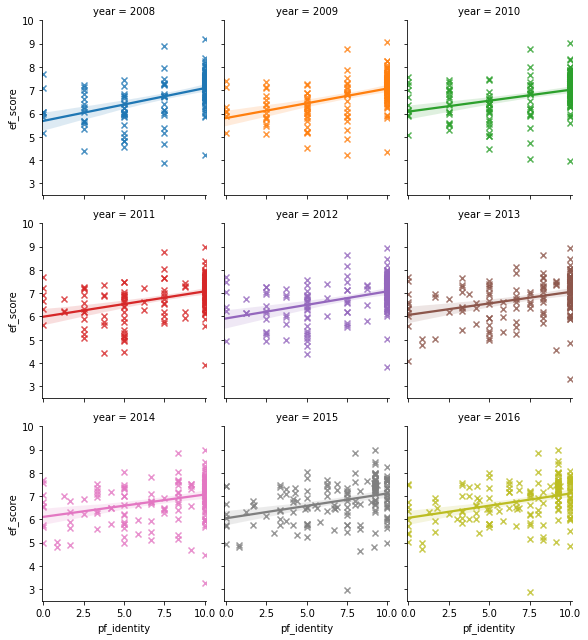

In [28]:
plt.figure(figsize=(3,3))
seaborn.lmplot(data=dataset, markers= "x", legend=True, x='pf_identity', y='ef_score', col="year", hue="year",
          col_wrap=3, height= 3, aspect= .9)

plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)
#muestra la relacion pf.vs.ef por año.

(-0.1, 10.1)

<Figure size 432x432 with 0 Axes>

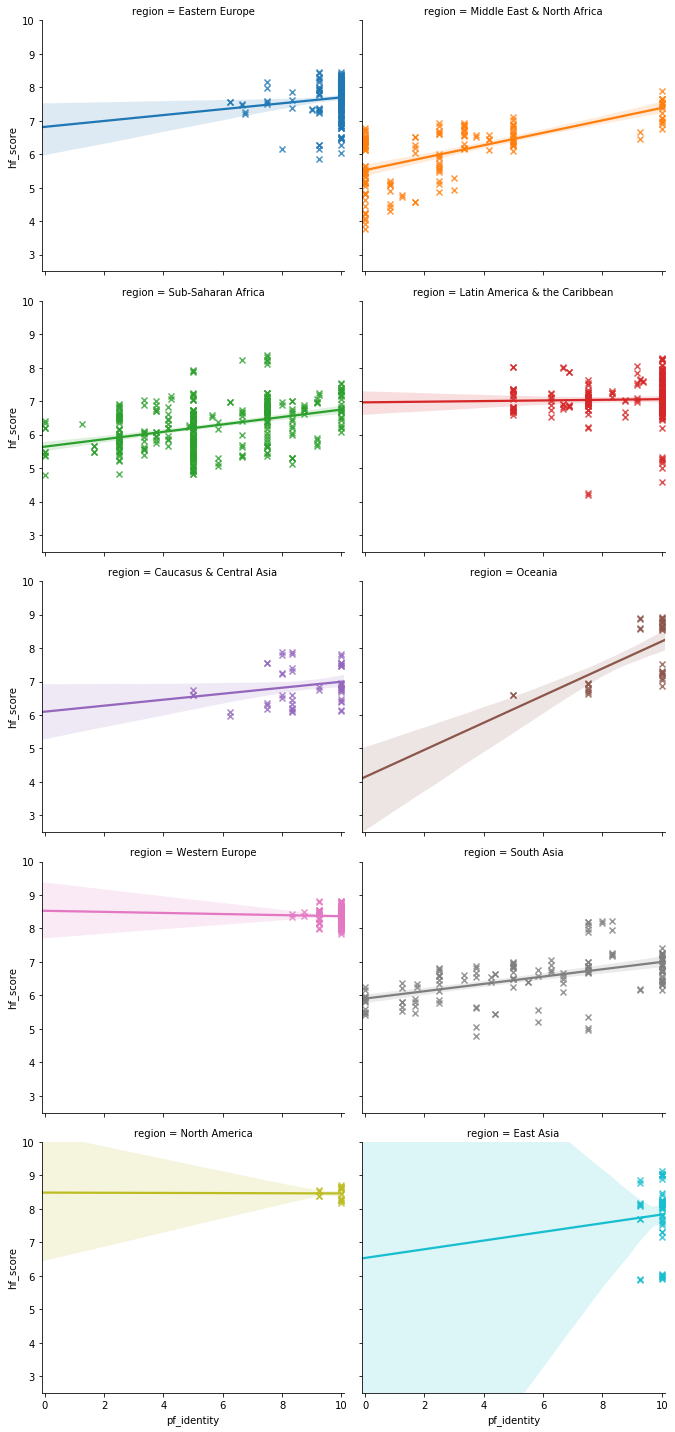

In [29]:
plt.figure(figsize=(6,6))
seaborn.lmplot(data=dataset, markers= "x", x='pf_identity', y='hf_score', col="region",col_wrap=2, hue="region", height= 4, aspect= 1.2)
plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)

### * En resumen, de los graficos obtenidos en esta seccion podemos afirmar que existe una relacion no decreciente entre la variable pf_identity y las demas; siendo America y Europa excepciones a dicha tendencia.
### * Tambien se puede destacar como región a Oceania, como el territorio con mayor desigualdad frente a estas variables y donde hay una marcada relacion entre libertad personal las demas variables.
### * Las graficas por año no indican una "evolucion" en materia de libertades personales, al menos globalmente.

## 3.3 Coeficientes de correlación

## Matriz de correlación de Spearman


In [30]:
spearman = dataset[important_cols].corr(method="spearman")
spearman.loc[["pf_identity","ef_score","hf_score"], ["pf_identity","ef_score","hf_score"]
            ].style.bar(subset=["pf_identity","ef_score","hf_score"], align='mid',color=['#d65f5f', '#e8ef23'])

,pf_identity,ef_score,hf_score
pf_identity,1,0.426993,0.686109
ef_score,0.426993,1,0.860647
hf_score,0.686109,0.860647,1


### * Ambos coeficientes confirman lo que se pudo observar en el grafico "pairplot", una baja correlacion del pf_identity con las demas variables analizadas.
### * Tambien describen la correlacion existente entre las variables hf_score y ef_score.
###  * El coeficiente Pearson fue descartado como metrica a tener en cuenta pues, por lo analizado en el inciso 2, la distribucion del espacio muestral no obedece a una distribucion normal.
### * El coeficiente de Kendall no aplica a este dataset por ser variables no categoricas.